### Q1: What are missing values in a dataset? Why is it essential to handle missing values? Name some algorithms that are not affected by missing values.

**Missing Values in a Dataset:**
Missing values in a dataset occur when no data value is stored for a variable in an observation. These can result from various reasons, such as data entry errors, measurement errors, or missing data points.


**MCAR, MAR, and MNAR**:

- **MCAR (Missing Completely at Random)**: The missingness is entirely independent of any data, observed or unobserved. E.g., a data entry error causing random missing values.

- **MAR (Missing at Random)**: The missingness is related to the observed data but not the unobserved data. E.g., missing income data might depend on employment status (observed) but not on the income itself (unobserved).

- **MNAR (Missing Not at Random)**: The missingness is related to the unobserved data itself. E.g., people with higher incomes might choose not to disclose their income.


**Importance of Handling Missing Values:**
1. **Accuracy:** Missing values can lead to inaccurate model predictions.
2. **Analysis Validity:** They can bias the results of data analysis, leading to invalid conclusions.
3. **Model Training:** Many machine learning algorithms do not work with missing values and can fail or give errors during training.

**Algorithms Not Affected by Missing Values:**
1. **Decision Trees** (e.g., CART, Random Forests) can handle missing values naturally by splitting nodes based on available features.
2. **K-Nearest Neighbors (KNN)** can impute missing values based on the nearest neighbors.
3. **XGBoost** has built-in handling for missing values during training.

### Q2: List down techniques used to handle missing data.  Give an example of each with python code.

**Techniques to Handle Missing Data:**

1. **Deletion Methods:**
   - **Listwise Deletion (Complete Case Analysis):** Remove any observations with missing values.
   - **Pairwise Deletion:** Use all available data for each analysis without removing entire observations.

2. **Imputation Methods:**
   - **Mean/Median/Mode Imputation:** Replace missing values with the mean, median, or mode of the column.
   - **Forward/Backward Fill:** Use the previous or next value in the sequence to fill missing values.
   - **K-Nearest Neighbors (KNN) Imputation:** Use the values from the nearest neighbors to impute missing data.
   - **Multivariate Imputation by Chained Equations (MICE):** Impute missing data through multiple rounds of regression modeling.

3. **Model-Based Methods:**
   - **Regression Imputation:** Predict missing values using a regression model based on other available variables.
   - **Expectation-Maximization (EM):** Use iterative methods to estimate missing data and update parameter estimates.

4. **Advanced Techniques:**
   - **Machine Learning Algorithms:** Use models like Random Forests, which can handle missing values internally.
   - **Deep Learning Methods:** Apply neural networks that can learn patterns in missing data.

5. **Special Techniques:**
   - **Indicator Method:** Add a binary indicator variable to flag missing values and impute with a specific value (e.g., zero).
   - **Multiple Imputation:** Generate multiple datasets with different imputed values and combine results for robust analysis.


In [1]:
# Importing necessary libraries
import seaborn as sns
import numpy as np
import pandas as pd

### Deletion Methods 
#### Deletion method is not efficient and should be avoided in most cases as we lost significant amount of data sometimes.
#### Here we are using 'titanic' dataset 

In [2]:
# creating dataframe 
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
# observing missing/null values
# here False represents 'not null' and true represents 'null' values
df.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
# finding total null values for each column
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
# observing shape of dataset
df.shape

(891, 15)

In [6]:
# deleting null values 
# Drop rows which contain missing values. default axis=0
# default inplace=Flase
df.dropna()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [7]:
# printing shape after dropping null values row-wise
df.dropna().shape
# observe we lost significant amount of data

(182, 15)

In [8]:
# deleting column wise 
#  Drop columns which contain missing values.
# inplace=False
df.dropna(axis=1)

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Second,man,True,no,True
887,1,1,female,0,0,30.0000,First,woman,False,yes,True
888,0,3,female,1,2,23.4500,Third,woman,False,no,False
889,1,1,male,0,0,30.0000,First,man,True,yes,True


In [9]:
df.dropna(axis=1).shape
# observe 4 columns removed which contains missing values

(891, 11)

## Imputation method 

#### Mean/Median/Mode Imputation:

**MEAN VALUE IMPUTATION**
<br>
It works well when we have normally distributed data

<AxesSubplot: xlabel='age', ylabel='Count'>

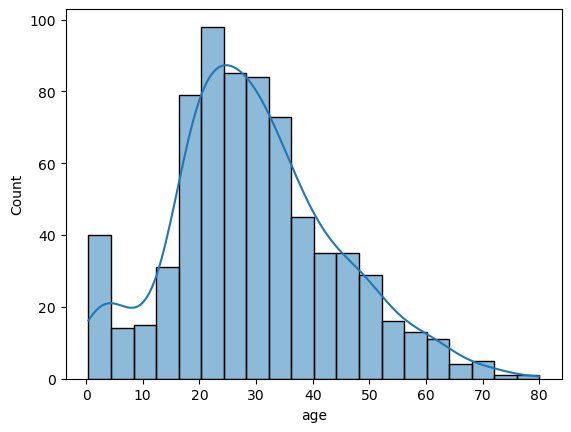

In [10]:
# as age column contains null values
# plotting graph to observe if the data is noramally distriuted or not
sns.histplot(df['age'],kde=True)

In [11]:
# since it seems like normal distribution so we will use mean imputation method
# adding new column, null values filled with mean values 
df['age_mean']=df['age'].fillna(df['age'].mean())

In [12]:
df[['age_mean','age']]

,age_mean,age
0,22.000000,22.0
1,38.000000,38.0
2,26.000000,26.0
3,35.000000,35.0
4,35.000000,35.0
...,...,...
886,27.000000,27.0
887,19.000000,19.0
888,29.699118,NaN
889,26.000000,26.0


<AxesSubplot: xlabel='age_mean', ylabel='Count'>

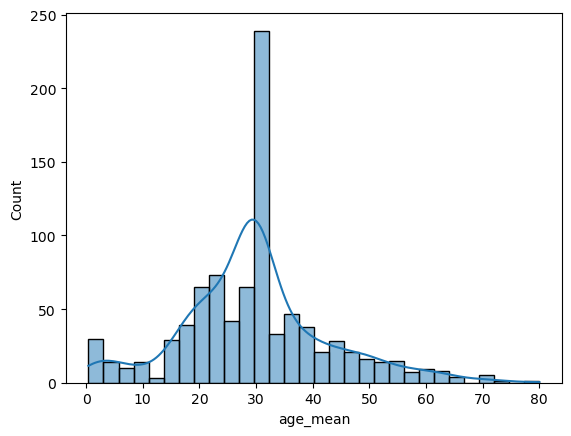

In [13]:
sns.histplot(df['age_mean'], kde=True)

In [14]:
len(df['age_mean'].unique())

89

**MEDIAN VALUE IMPUTATION**
<br>
It works well when we have outliers

In [15]:
# adding new column 'age_median' and filling all null values with median of age column
df['age_median']=df['age'].fillna(df['age'].median())

In [16]:
df[['age_mean','age_median','age']]

,age_mean,age_median,age
0,22.000000,22.0,22.0
1,38.000000,38.0,38.0
2,26.000000,26.0,26.0
3,35.000000,35.0,35.0
4,35.000000,35.0,35.0
...,...,...,...
886,27.000000,27.0,27.0
887,19.000000,19.0,19.0
888,29.699118,28.0,NaN
889,26.000000,26.0,26.0


<AxesSubplot: xlabel='age_median', ylabel='Count'>

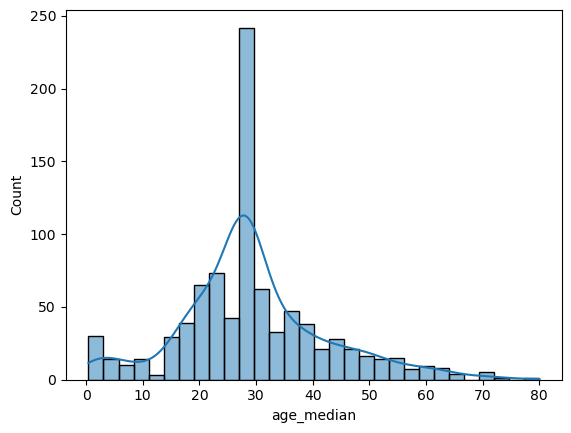

In [17]:
sns.histplot(df['age_median'],kde=True)

In [18]:
# we can also check that this age_median column has no null values
df['age_median'].isnull().sum()

0

**MODE VALUE IMPUTATION**
<br>
It works well when we have categorical data

In [19]:
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_mean,age_median
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,22.000000,22.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,38.000000,38.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,26.000000,26.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,35.000000,35.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,35.000000,35.0
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True,29.699118,28.0
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True,54.000000,54.0
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False,2.000000,2.0
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False,27.000000,27.0
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False,14.000000,14.0


In [20]:
# observe the embared column have categorical values and nulls also
df[df['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_mean,age_median
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0


In [21]:
# it is good to fill these values with mode of the respective column
# creating new column
df['embarked_mode']=df['embarked'].fillna(df['embarked'].mode())

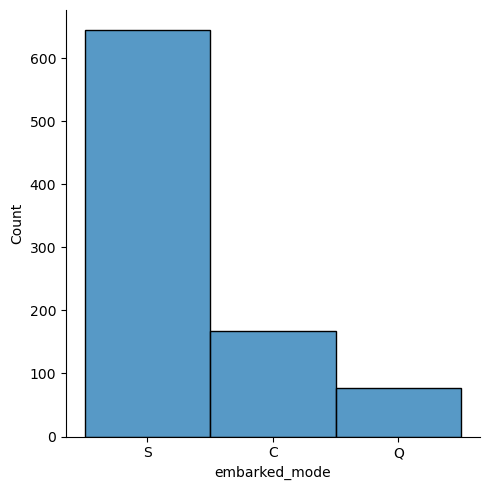

In [22]:
sns.displot(df['embarked_mode'])

**Forward/Backward Fill**

In [23]:
df = pd.DataFrame({
    'A': [1, 2, None, 4],
    'B': [5, None, None, 8],
    'C': [9, 10, 11, None]
})

# Forward Fill
df_forward_fill = df.fillna(method='ffill')
print(df_forward_fill)

     A    B     C
0  1.0  5.0   9.0
1  2.0  5.0  10.0
2  2.0  5.0  11.0
3  4.0  8.0  11.0


**K-Nearest Neighbors (KNN) Imputation**

In [24]:
import pandas as p
from sklearn.impute import KNNImputer

# Example DataFrame
df = pd.DataFrame({
    'A': [1, 2, None, 4],
    'B': [5, None, None, 8],
    'C': [9, 10, 11, None]
})

# KNN Imputation
knn_imputer = KNNImputer(n_neighbors=2)
df_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(df), columns=df.columns)
print(df_knn_imputed)

     A    B     C
0  1.0  5.0   9.0
1  2.0  6.5  10.0
2  1.5  6.5  11.0
3  4.0  8.0   9.5


### Q3: Explain the imbalanced data. What will happen if imbalanced data is not handled?

**Imbalanced Data:**

Imbalanced data occurs when the classes in a classification dataset are not represented equally. Typically, one class (often the minority class) has significantly fewer instances than the other class (majority class).<br> For example, in a dataset for fraud detection, fraudulent transactions (minority class) might be much less frequent than non-fraudulent transactions (majority class).

**Consequences of Not Handling Imbalanced Data:**

1. **Bias Towards Majority Class:** Machine learning models can become biased towards the majority class because they are trained on more instances of that class. This can result in the model predominantly predicting the majority class, ignoring the minority class.

2. **Poor Predictive Performance:** Metrics such as accuracy can be misleading in imbalanced datasets. A model might achieve high accuracy by simply predicting the majority class all the time, but this would be ineffective for identifying the minority class.

3. **Misleading Evaluation Metrics:** Common metrics like accuracy do not reflect the true performance of the model on imbalanced data. More appropriate metrics like precision, recall, F1-score, or area under the ROC curve (AUC-ROC) should be used to evaluate models.

4. **Underrepresentation of Minority Class:** The minority class might be underrepresented in the training process, leading to poor generalization and detection of this class in real-world scenarios.

**Handling Imbalanced Data:**

1. **Resampling Techniques:**
   - **Oversampling the Minority Class:** Increase the number of instances in the minority class by duplicating samples or creating synthetic examples (e.g., SMOTE - Synthetic Minority Over-sampling Technique).
   - **Undersampling the Majority Class:** Reduce the number of instances in the majority class to balance the class distribution.

2. **Algorithmic Approaches:**
   - **Cost-sensitive Learning:** Modify the learning algorithm to give more importance (or higher cost) to misclassifications of the minority class.
   - **Anomaly Detection:** Treat the minority class as anomalies or outliers and use anomaly detection techniques to identify them.

3. **Ensemble Methods:**
   - **Balanced Random Forest:** Combine multiple decision trees trained on balanced subsets of the data.
   - **Boosting Algorithms:** Use algorithms like AdaBoost or XGBoost that focus on improving the classification of difficult instances, often from the minority class.

4. **Evaluation Metrics:**
   - Use metrics like precision, recall, F1-score, AUC-ROC, and confusion matrices to evaluate the model's performance on imbalanced data.

### Q4: What are Up-sampling and Down-sampling? Explain with an example when up-sampling and downsampling are required.

**Up-sampling and Down-sampling:**

**Up-sampling (Over-sampling):**
Up-sampling involves increasing the number of instances in the minority class to balance the class distribution. This can be done by duplicating existing minority class samples or generating synthetic samples.

**Down-sampling (Under-sampling):**
Down-sampling involves decreasing the number of instances in the majority class to balance the class distribution. This is done by randomly removing samples from the majority class.

**When Up-sampling and Down-sampling are Required:**

**Example Scenario: Fraud Detection**

Suppose you have a dataset for fraud detection with 100,000 transactions, where only 1,000 are fraudulent (minority class) and 99,000 are non-fraudulent (majority class). This is a highly imbalanced dataset.

**When to Use Each Method:**

- **Up-sampling:**
  - When the minority class has very few instances, making it difficult for the model to learn.
  - When preserving all majority class instances is important.
  - When computational resources are not a constraint.

- **Down-sampling:**
  - When the dataset is extremely large, and training on the full dataset is computationally expensive.
  - When you want to reduce the influence of the majority class on the model.
  - When you want to ensure faster training times.

**UP-SAMPLING & DOWN-SAMPLING EXAMPLE**

In [25]:
# creating an imbalanced dataset
import numpy as np
import pandas as pd

sample_size=1000
class_0_ratio=0.9  #90%
n_class_0 = int(sample_size*class_0_ratio)
n_class_1 = sample_size-n_class_0


np.random.seed(5)

df_0 = pd.DataFrame(
    {'Feature_1' : np.random.normal(loc=1, scale=1, size= n_class_0),
     'Feature_2' : np.random.normal(loc=1, scale=1, size=n_class_0),
     'target' : [0] * n_class_0
})

df_1 = pd.DataFrame({
    'Feature_1' : np.random.normal(loc=2, scale=1, size=n_class_1),
    'Feature_2' : np.random.normal(loc=2, scale=1, size=n_class_1),
    'target' : [1]*n_class_1
})

df=pd.concat([df_0,df_1]).reset_index(drop=True)


In [26]:
print(df.head())
print(df.tail())

   Feature_1  Feature_2  target
0   1.441227  -0.646011       0
1   0.669130  -0.793660       0
2   3.430771   0.020661       0
3   0.747908  -0.010608       0
4   1.109610   0.388915       0
     Feature_1  Feature_2  target
995   0.269427   3.391913       1
996   2.275679   2.620613       1
997   1.066230   2.704233       1
998   1.434105   0.814266       1
999   1.709118  -1.507475       1


In [27]:
# imbalanced dataset
df['target'].value_counts()

0    900
1    100
Name: target, dtype: int64

**up-sampling**

In [28]:
# first we have to divide both datasets into two groups ( for e.g. majority and minority)
df_majority = df[df['target']==0]
df_minority = df[df['target']==1]


from sklearn.utils import resample

df_upsampled_minority = resample(
                                df_minority,  # dataframe to be upsampled
                                replace=True, 
                                n_samples=len(df_majority),
                                random_state=22
                                )
df_upsampled_minority.head()

,Feature_1,Feature_2,target
904,3.309688,1.688726,1
944,2.099713,1.940227,1
964,1.933189,1.314019,1
984,1.909941,3.081069,1
908,3.122819,2.562201,1


In [29]:
df_upsampled_minority.shape

(900, 3)

In [30]:
# finally merging the dataframe into 1
df_upsampled= pd.concat([df_majority,df_upsampled_minority]).reset_index(drop=True)

# final upscaled_dataset
print('total datapoints : ',len(df_upsampled))

df_upsampled['target'].value_counts()

total datapoints :  1800


0    900
1    900
Name: target, dtype: int64

**down-sampling**

In [31]:
# we have two datasets namely 
# df_majority  &  df_minority

df_downsampled_majority = resample(
                          df_majority,
                          replace=True,
                          n_samples=len(df_minority),
                          random_state=33
                          )
df_downsampled_majority.head()

,Feature_1,Feature_2,target
20,0.019392,0.953824,0
391,-0.731054,0.289134,0
728,2.001061,1.164572,0
578,1.282994,2.130381,0
658,-1.229461,2.366257,0


In [32]:
df_downsampled_majority.shape

(100, 3)

In [33]:
# merging into one down-sampleded dataset
df_downsampled = pd.concat([df_downsampled_majority,df_minority]).reset_index(drop=True)

# final downscaled_dataset
print('total datapoints : ',len(df_downsampled))

df_downsampled['target'].value_counts()

total datapoints :  200


0    100
1    100
Name: target, dtype: int64

### Q5: What is data Augmentation? Explain SMOTE.

**Data Augmentation:**

Data augmentation refers to techniques used to increase the diversity and size of a dataset without actually collecting new data. It is often used in machine learning, especially in image and text data, to improve model generalization and performance. In the context of imbalanced datasets, data augmentation methods like SMOTE (Synthetic Minority Over-sampling Technique) are commonly used to balance the class distribution.

**SMOTE (Synthetic Minority Over-sampling Technique):**

SMOTE is a popular data augmentation technique specifically designed to address class imbalance in datasets. It generates synthetic examples of the minority class by interpolating between existing minority class instances. This helps to balance the dataset and improve the performance of machine learning models.

**How SMOTE Works:**

1. **Select Minority Class Instances:** Identify the instances of the minority class in the dataset.
2. **Find Nearest Neighbors:** For each minority class instance, find its k-nearest neighbors (typically using Euclidean distance).
3. **Generate Synthetic Instances:** Randomly select one or more of the k-nearest neighbors and create synthetic instances by interpolating between the selected minority class instance and its neighbors. This is done by taking a random point along the line segment joining the two instances.

In [34]:
from sklearn.datasets import make_classification

# Generating a synthetic dataset
x, y = make_classification(
    n_samples=1000,          # Total number of samples (rows) to generate
    n_redundant=0,           # Number of redundant features, which are linear combinations of the informative features
    n_features=2,            # Total number of features (columns) to generate
    n_clusters_per_class=1,  # Number of clusters per class
    weights=[0.90],          # Proportion of samples assigned to each class, in this case, 90% to one class and 10% to the other
    random_state=12          # Seed for random number generation to ensure reproducibility
)

In [35]:
print(x.shape)
print(len(y))
print(len(y[y==0]))
print(len(y[y==1]))

(1000, 2)
1000
900
100


In [36]:
i=0
while i<5:
    print(x[i])
    i+=1

[-0.76289759 -0.70680807]
[-1.07543571 -1.0511621 ]
[-0.61011459 -0.90980157]
[-2.02328392 -0.42894472]
[-0.81292105 -1.31620563]


In [37]:
i=0
while i<5:
    print(y[i])
    i+=1

0
0
0
1
0


In [38]:
# creating dataframe / SYNTHETIC DATASET

df1 = pd.DataFrame(x,columns=['col_1','col_2']) 
df2 = pd.DataFrame(y,columns=['target'])

# merging into one dataFrame
df = pd.concat([df1,df2],axis=1).reset_index(drop=True)

df.head()

,col_1,col_2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [39]:
df['target'].value_counts()

0    900
1    100
Name: target, dtype: int64

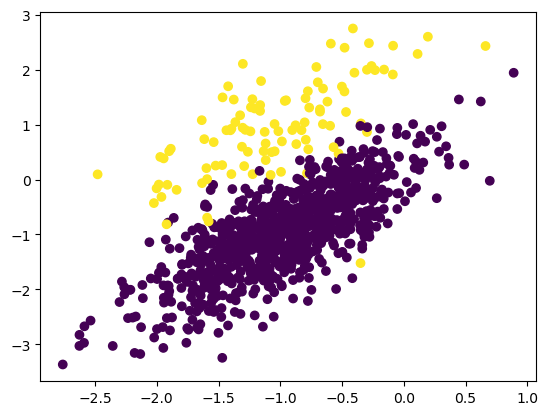

In [40]:
import matplotlib.pyplot as plt
plt.scatter(df['col_1'],df['col_2'],c=df['target'])

In [41]:
# appling SMOTE on dataset 'df'

In [42]:
!pip install imblearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 8.6 MB/s eta 0:00:00


In [43]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()

x1 , y1 = oversample.fit_resample( df[['col_1', 'col_2']] , df['target'] )

In [44]:
print(x1.shape)
print(y1.shape)

(1800, 2)
(1800,)


In [45]:
# creating a data frame from both and combining into one dataset or data-frame 

df_1 = pd.DataFrame(x1, columns=['col_1','col_2'])
df_2 = pd.DataFrame(y1, columns=['target'])

df_resampled= pd.concat([df_1,df_2], axis = 1).reset_index(drop=True)

In [46]:
df_resampled

,col_1,col_2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0
...,...,...,...
1795,-1.572688,0.767757,1
1796,-0.062590,2.183893,1
1797,-1.408755,0.916369,1
1798,-1.268132,0.226398,1


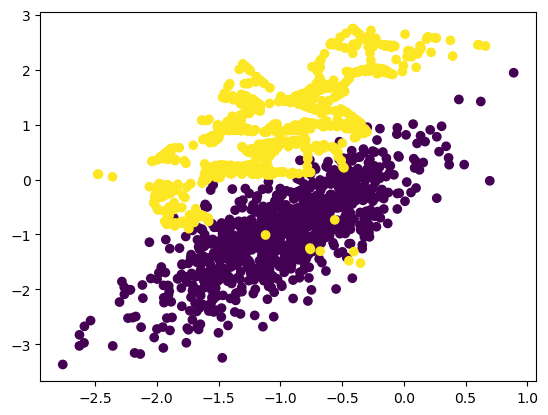

In [47]:
plt.scatter(df_resampled['col_1'], df_resampled['col_2'], c = df_resampled['target'])
plt.show()

**Comparing SMOTE and traditional resampling techniques (up-sampling and down-sampling):**

| Feature                | SMOTE (Synthetic Minority Over-sampling Technique) | Up-sampling (Over-sampling) | Down-sampling (Under-sampling) |
|------------------------|-----------------------------------------------------|-----------------------------|--------------------------------|
| **Basic Concept**      | Generates synthetic samples for the minority class by interpolating between existing minority samples. | Duplicates existing minority class samples to increase their representation. | Removes samples from the majority class to reduce their representation. |
| **Data Generation**    | Creates new, synthetic data points.                | Does not create new data, just duplicates existing data. | Does not create new data, just reduces existing data. |
| **Risk of Overfitting**| Lower risk of overfitting compared to up-sampling because new, varied data points are generated. | Higher risk of overfitting due to repeated instances. | Lower risk of overfitting but can lead to loss of valuable information. |
| **Data Balance**       | Balances the dataset by increasing the minority class size with synthetic data. | Balances the dataset by increasing the minority class size with duplicated data. | Balances the dataset by decreasing the majority class size. |
| **Computational Cost** | Higher computational cost due to the generation of synthetic data points. | Moderate computational cost due to duplication of data. | Lower computational cost but may result in data loss. |
| **Use Case**           | Best when the minority class has very few instances and the dataset is highly imbalanced. | Useful when computational resources are sufficient and overfitting is not a major concern. | Useful when computational resources are limited or when the majority class significantly outweighs the minority class. |
| **Impact on Majority Class** | Does not affect the majority class. | Does not affect the majority class. | Reduces the number of samples in the majority class. |
| **Implementation Complexity** | More complex due to the need for generating synthetic samples. | Simple to implement using standard resampling methods. | Simple to implement using standard resampling methods. |

### Q6: What are outliers in a dataset? Why is it essential to handle outliers?


**Outliers in a Dataset:**
<br>
Outliers are data points that differ significantly from other observations in a dataset. They may be much higher or lower than the rest of the data, indicating that they are outside the expected range of values. Outliers can occur due to various reasons, such as measurement errors, data entry mistakes, or genuine variability in the data.

#### Importance of Handling Outliers:

1. **Impact on Statistical Analysis:**
   - **Mean and Standard Deviation:** Outliers can disproportionately affect measures like the mean and standard deviation, leading to inaccurate estimates of central tendency and variability.
   - **Correlation and Regression:** Outliers can distort correlation coefficients and regression models, making it difficult to identify true relationships between variables.

2. **Impact on Machine Learning Models:**
   - **Model Performance:** Outliers can adversely affect the performance of machine learning models by skewing the training process. Algorithms like linear regression, logistic regression, and k-means clustering are particularly sensitive to outliers.
   - **Model Interpretation:** The presence of outliers can complicate the interpretation of model results, making it hard to draw meaningful conclusions from the data.

3. **Data Integrity:**
   - **Data Quality:** Outliers may indicate issues with data quality, such as data entry errors or measurement inaccuracies. Identifying and addressing outliers can help improve the overall quality of the dataset.
   - **Anomaly Detection:** In some cases, outliers may represent important anomalies or rare events that require further investigation (e.g., fraud detection, medical diagnosis). Properly handling these outliers can enhance the detection and understanding of such events.

#### Techniques to Handle Outliers:

1. **Detection:**
   - **Visualization:** Use box plots, scatter plots, and histograms to visually identify outliers.
   - **Statistical Methods:** Apply statistical tests and methods such as the Z-score, IQR (Interquartile Range), and Mahalanobis distance to detect outliers.

2. **Handling:**
   - **Removal:** Remove outliers from the dataset if they are determined to be errors or irrelevant to the analysis.
   - **Transformation:** Apply transformations (e.g., log, square root) to reduce the impact of outliers.
   - **Imputation:** Replace outliers with more representative values, such as the median or mean of the surrounding data.
   - **Robust Methods:** Use robust statistical methods and machine learning algorithms that are less sensitive to outliers (e.g., median-based methods, robust regression).


#### **Five-Number Summary and Box Plot** 

The five-number summary is a concise way to describe the distribution of a dataset using five key statistics:

1. **Minimum:** The smallest value in the dataset.
2. **First Quartile (Q1):** The 25th percentile, which divides the lowest 25% of the data from the rest.
3. **Median (Q2):** The 50th percentile, or the middle value when the data is sorted.
4. **Third Quartile (Q3):** The 75th percentile, which divides the lowest 75% of the data from the top 25%.
5. **Maximum:** The largest value in the dataset.

**Important Points:**
- **Range:** Difference between the maximum and minimum values.
- **Interquartile Range (IQR):** Difference between Q3 and Q1, representing the middle 50% of the data.
- **Descriptive Statistics:** Provides a summary of the data distribution, highlighting central tendency and spread.
- **Robustness:** Less sensitive to outliers compared to measures like the mean.

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

random.seed(1)

# generating random dataset
# lst_heights = [ round((random.random())*1000,2) for i in range(20) ] 

lst_heights = [160,170,165,154,155,204,111,190,170,163,153,144,170,222,151,169,100,50,166]

In [49]:
# using list comprehension
minimum,Q1,median,Q3,maximum = np.quantile(lst_heights,[0,0.25,0.5,0.75,1.0])

In [50]:
minimum,Q1,median,Q3,maximum 

(50.0, 152.0, 163.0, 170.0, 222.0)

In [51]:
IQR = Q3 - Q1
lower_fence = Q1 - 1.5*(IQR)
higher_fence = Q3 + 1.5*(IQR)
outliers = [ i for i in lst_heights if (i < lower_fence) or (i>higher_fence) ]
lst_heights.sort()
outliers.sort()

In [52]:
print('Minimum : ',minimum)
print('Q1      : ',Q1)
print('Median  : ',median)
print('Q3      : ',Q3)
print('Maximum : ',maximum)
print()
print('lower_fence : ',lower_fence)
print('higher_fence :',higher_fence)
print()
print('dataset : ',lst_heights)
print()
print('outliers are : ',outliers)

Minimum :  50.0
Q1      :  152.0
Median  :  163.0
Q3      :  170.0
Maximum :  222.0

lower_fence :  125.0
higher_fence : 197.0

dataset :  [50, 100, 111, 144, 151, 153, 154, 155, 160, 163, 165, 166, 169, 170, 170, 170, 190, 204, 222]

outliers are :  [50, 100, 111, 204, 222]


<AxesSubplot: >

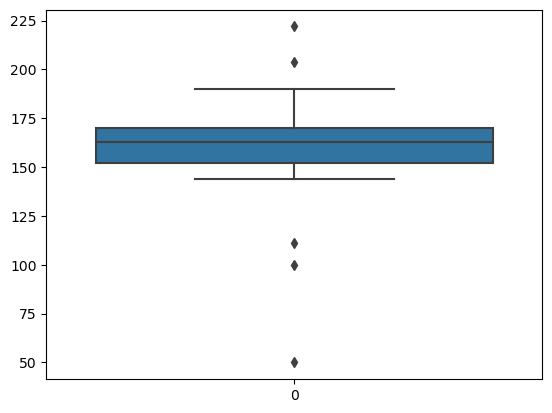

In [53]:
# boxplot of lst_heights
# cross check outliers !
import seaborn as sns 
sns.boxplot(lst_heights)

## Understanding Data Interpolation
Data interpolation is the process of estimating unknown values within a dataset based on the known values. In Python, there are various libraries available that can be used for data interpolation, such as NumPy, SciPy, and Pandas. Here is an example of how to perform data interpolation using the NumPy library:

1. Linear Interpolation
2. Cubic Interpolation With Scipy
3. Polynomial Interpolation

#### 1.Liner Interpolation

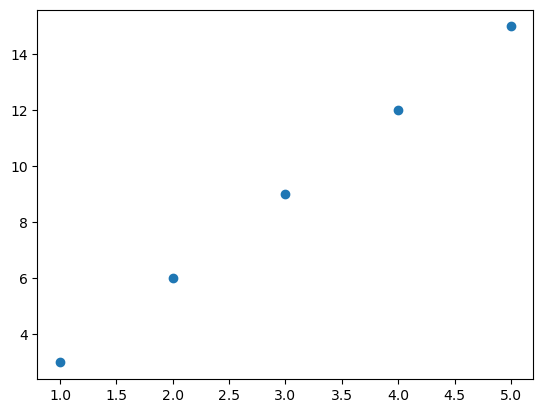

[1.         1.28571429 1.57142857 1.85714286 2.14285714 2.42857143
 2.71428571 3.         3.28571429 3.57142857 3.85714286 4.14285714
 4.42857143 4.71428571 5.        ]
[ 3.          3.85714286  4.71428571  5.57142857  6.42857143  7.28571429
  8.14285714  9.          9.85714286 10.71428571 11.57142857 12.42857143
 13.28571429 14.14285714 15.        ]


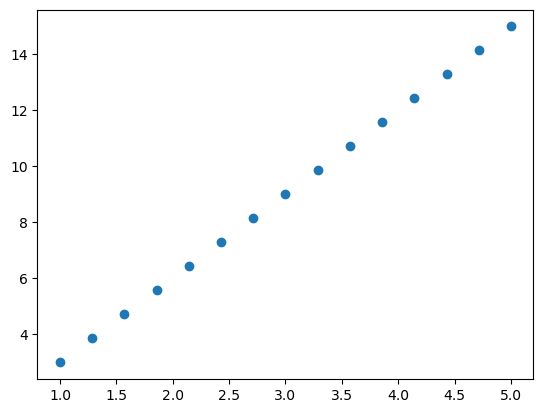

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# creating liner dataset
x = np.array([1,2,3,4,5])
y = np.array([3,6,9,12,15])

# plotting the scatter plot
plt.scatter(x,y)
plt.show()

# interpolating the data using linear interpolation 
x_new = np.linspace(1,5,15) # new values for x-axis
y_interp = np.interp(x_new, x,y) # creating values for y axis (interpolated values of y acc. to x and y)

print(x_new)
print(y_interp)

plt.scatter(x_new,y_interp)
plt.show()

#### 2. Cubic Interpolation

[1.         1.21052632 1.42105263 1.63157895 1.84210526 2.05263158
 2.26315789 2.47368421 2.68421053 2.89473684 3.10526316 3.31578947
 3.52631579 3.73684211 3.94736842 4.15789474 4.36842105 4.57894737
 4.78947368 5.        ]
[ 1.00000000e+00 -5.26169996e-01 -8.16008164e-01  3.71774311e-02
  1.94007873e+00  4.79938767e+00  8.52179618e+00  1.30139962e+01
  1.81826797e+01  2.39345386e+01  3.01809302e+01  3.69405161e+01
  4.43392623e+01  5.25078000e+01  6.15767605e+01  7.16767750e+01
  8.29384750e+01  9.54924916e+01  1.09469456e+02  1.25000000e+02]


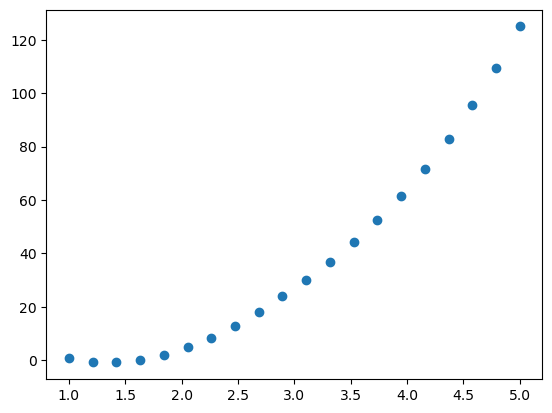

In [55]:
from scipy.interpolate import interp1d

x = np.array([1,2,3,4,5])
y = np.array([1,4,27,64,125])

# creating interpolation function 
i_func = interp1d(x,y,kind = 'cubic')

x_new = np.linspace(1,5,20)

# interpolating data
y_interp = i_func(x_new)

print(x_new)
print(y_interp)

plt.scatter(x_new,y_interp)
plt.show()

#### 3. Polynomial Interpolation

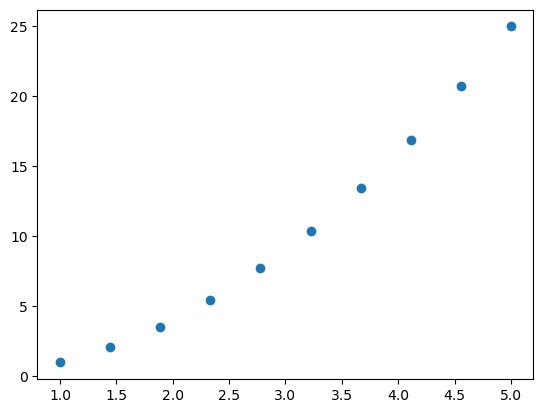

In [56]:
# creating random data

x = np.array([1,2,3,4,5])
y = np.array([1,4,9,16,25])

# interpolating polynomial data 
p = np.polyfit(x,y,2) # 2 is degree o fitting polynomial, here '2'

x_new = np.linspace(1,5,10)

# interpolating y values
y_interp = np.polyval(p,x_new)

plt.scatter(x_new, y_interp)
plt.show()

## Q7: You are working on a project that requires analyzing customer data. However, you notice that some of the data is missing. What are some techniques you can use to handle the missing data in your analysis?

Ans. Refer solution of Question No.1

### Q8: You are working with a large dataset and find that a small percentage of the data is missing. What are some strategies you can use to determine if the missing data is missing at random or if there is a pattern to the missing data?

To determine if missing data is missing at random or if there is a pattern, we can use the following strategies:

1. **Visual Inspection:**
   - **Heatmaps:** Use heatmaps to visualize the missing data and identify patterns.
   - **Missing Data Plots:** Use missing data plots to show where data is missing.

2. **Statistical Tests:**
   - **Little’s MCAR Test:** This test checks if data is Missing Completely at Random (MCAR).
   - **Chi-Square Test:** Compare the distribution of missing and non-missing data across different variables to see if there are significant differences.

3. **Correlation Analysis:**
   - **Missing Data Correlation:** Calculate correlations between missingness indicators (binary variables indicating whether data is missing) and other variables.

4. **Pattern Analysis:**
   - **Group Analysis:** Analyze missing data patterns within subgroups of the data.
   - **Time-Series Analysis:** Check for patterns in missing data over time if dealing with time-series data.

5. **Machine Learning Models:**
   - **Predictive Models:** Use machine learning models to predict missingness. If the model performs well, it indicates a pattern to the missing data.

### Q9: Suppose you are working on a medical diagnosis project and find that the majority of patients in the dataset do not have the condition of interest, while a small percentage do. What are some strategies you can use to evaluate the performance of your machine learning model on this imbalanced dataset?

Ans. Refer solution of Question no.3

### Q10: When attempting to estimate customer satisfaction for a project, you discover that the dataset is unbalanced, with the bulk of customers reporting being satisfied. What methods can you employ to balance the dataset and down-sample the majority class?

Ans. Refer solution of question no.4

### Q11: You discover that the dataset is unbalanced with a low percentage of occurrences while working on a project that requires you to estimate the occurrence of a rare event. What methods can you employ to balance the dataset and up-sample the minority class?

Ans. Refer solution of Question no.4